In [80]:
!pip install geopy


In [81]:
!pip install folium

In [82]:
import pandas as pd
from geopy.geocoders import Nominatim


In [83]:
import folium

In [84]:
import pandas as pd
path = r"C:\Users\adity\OneDrive\Desktop\ML\restro_project\addressbook_for_lat_long.csv"
df = pd.read_csv(path)
df

,Restaurant_Name,LocalityCity
0,AB's - Absolute Barbecues,"Hinjawadi, Pune, India"
1,I Amsterdam,"Hinjawadi, Pune, India"
2,Flechazo,"Wakad, Pune, India"
3,Barbeque Nation - Sayaji Hotel,"Wakad, Pune, India"
4,BeHive,"Hinjawadi, Pune, India"
...,...,...
1827,Superman's Cafe,"Wakad, Pune, India"
1828,The Chinese Box,"Aundh, Pune, India"
1829,Not Just Parathas,"Wakad, Pune, India"
1830,Southentic,"Wakad, Pune, India"


In [85]:
geolocator = Nominatim(timeout=10, user_agent = "Your_Name")

In [86]:
geocodes=[geolocator.geocode(df['LocalityCity'][x])for x in range(len(df))]
geocodes

[Location(Hinjawadi, Mulshi, Pune, Maharashtra, 411057, India, (18.5927532, 73.7382151, 0.0)),
 Location(Hinjawadi, Mulshi, Pune, Maharashtra, 411057, India, (18.5927532, 73.7382151, 0.0)),
 Location(Wakad, Mulshi, Pune, Maharashtra, 411027, India, (18.6022495, 73.7644454, 0.0)),
 Location(Wakad, Mulshi, Pune, Maharashtra, 411027, India, (18.6022495, 73.7644454, 0.0)),
 Location(Hinjawadi, Mulshi, Pune, Maharashtra, 411057, India, (18.5927532, 73.7382151, 0.0)),
 Location(Wakad, Mulshi, Pune, Maharashtra, 411027, India, (18.6022495, 73.7644454, 0.0)),
 Location(Hinjawadi, Mulshi, Pune, Maharashtra, 411057, India, (18.5927532, 73.7382151, 0.0)),
 Location(Baner, Pune City, Pune, Maharashtra, 511045, India, (18.5642431, 73.7768573, 0.0)),
 Location(Wakad, Mulshi, Pune, Maharashtra, 411027, India, (18.6022495, 73.7644454, 0.0)),
 Location(Hinjawadi, Mulshi, Pune, Maharashtra, 411057, India, (18.5927532, 73.7382151, 0.0)),
 Location(Sus, Mulshi, Pune, Maharashtra, 511045, India, (18.553667

In [87]:
df['lat'] = [g.latitude for g in geocodes]
df['lon'] = [g.longitude for g in geocodes]
df.dropna(axis=0)
df

,Restaurant_Name,LocalityCity,lat,lon
0,AB's - Absolute Barbecues,"Hinjawadi, Pune, India",18.592753,73.738215
1,I Amsterdam,"Hinjawadi, Pune, India",18.592753,73.738215
2,Flechazo,"Wakad, Pune, India",18.602249,73.764445
3,Barbeque Nation - Sayaji Hotel,"Wakad, Pune, India",18.602249,73.764445
4,BeHive,"Hinjawadi, Pune, India",18.592753,73.738215
...,...,...,...,...
1827,Superman's Cafe,"Wakad, Pune, India",18.602249,73.764445
1828,The Chinese Box,"Aundh, Pune, India",18.561883,73.810196
1829,Not Just Parathas,"Wakad, Pune, India",18.602249,73.764445
1830,Southentic,"Wakad, Pune, India",18.602249,73.764445


In [88]:
map1 = folium.Map(location=(18.9, 73.3), zoom_start=12)
for index,row in df.iterrows():
  folium.Marker(location=(row['lat'],row['lon']), popup=row['LocalityCity']).add_to(map1)
display(map1)

In [89]:
import sklearn.mixture as sm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [90]:
path =r"C:\Users\adity\OneDrive\Desktop\ML\restro_project\geocoding_new.csv"
data = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ML\restro_project\geocoding_new.csv")
data

,Restaurant_Name,Detail_address,Latitude,Longitude,review_count,stars
0,AB's - Absolute Barbecues,"White Square Building, Hinjawadi, Pune",18.590904,73.753085,7029,5
1,I Amsterdam,"Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...",18.594911,73.728838,430,4
2,Flechazo,"165, 3rd Floor, Vantagio, Near Silver Sports C...",18.592662,73.759950,4731,5
3,Barbeque Nation - Sayaji Hotel,"Sayaji Hotel, 10th Floor, 135/136, Mumbai Bang...",18.599722,73.754868,2999,5
4,BeHive,"New DP Road, Near Laxmi Chowk, Hinjawadi, Pune",18.606650,73.730624,1437,4
...,...,...,...,...,...,...
1827,Superman's Cafe,"Shop 3, Near Indira College, Tathwade, Wakad, ...",18.609633,73.745996,0,0
1828,The Chinese Box,"Flat 3, 1st Floor, Balaji Niwas, Sharda Park, ...",18.560147,73.802701,0,0
1829,Not Just Parathas,"Hinjewadi Road, Kaspate Corner, Wakad, Pune",18.588410,73.768740,0,0
1830,Southentic,"Wakad Kaspate Corner, Wakad, Pune",18.590364,73.768606,0,0


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

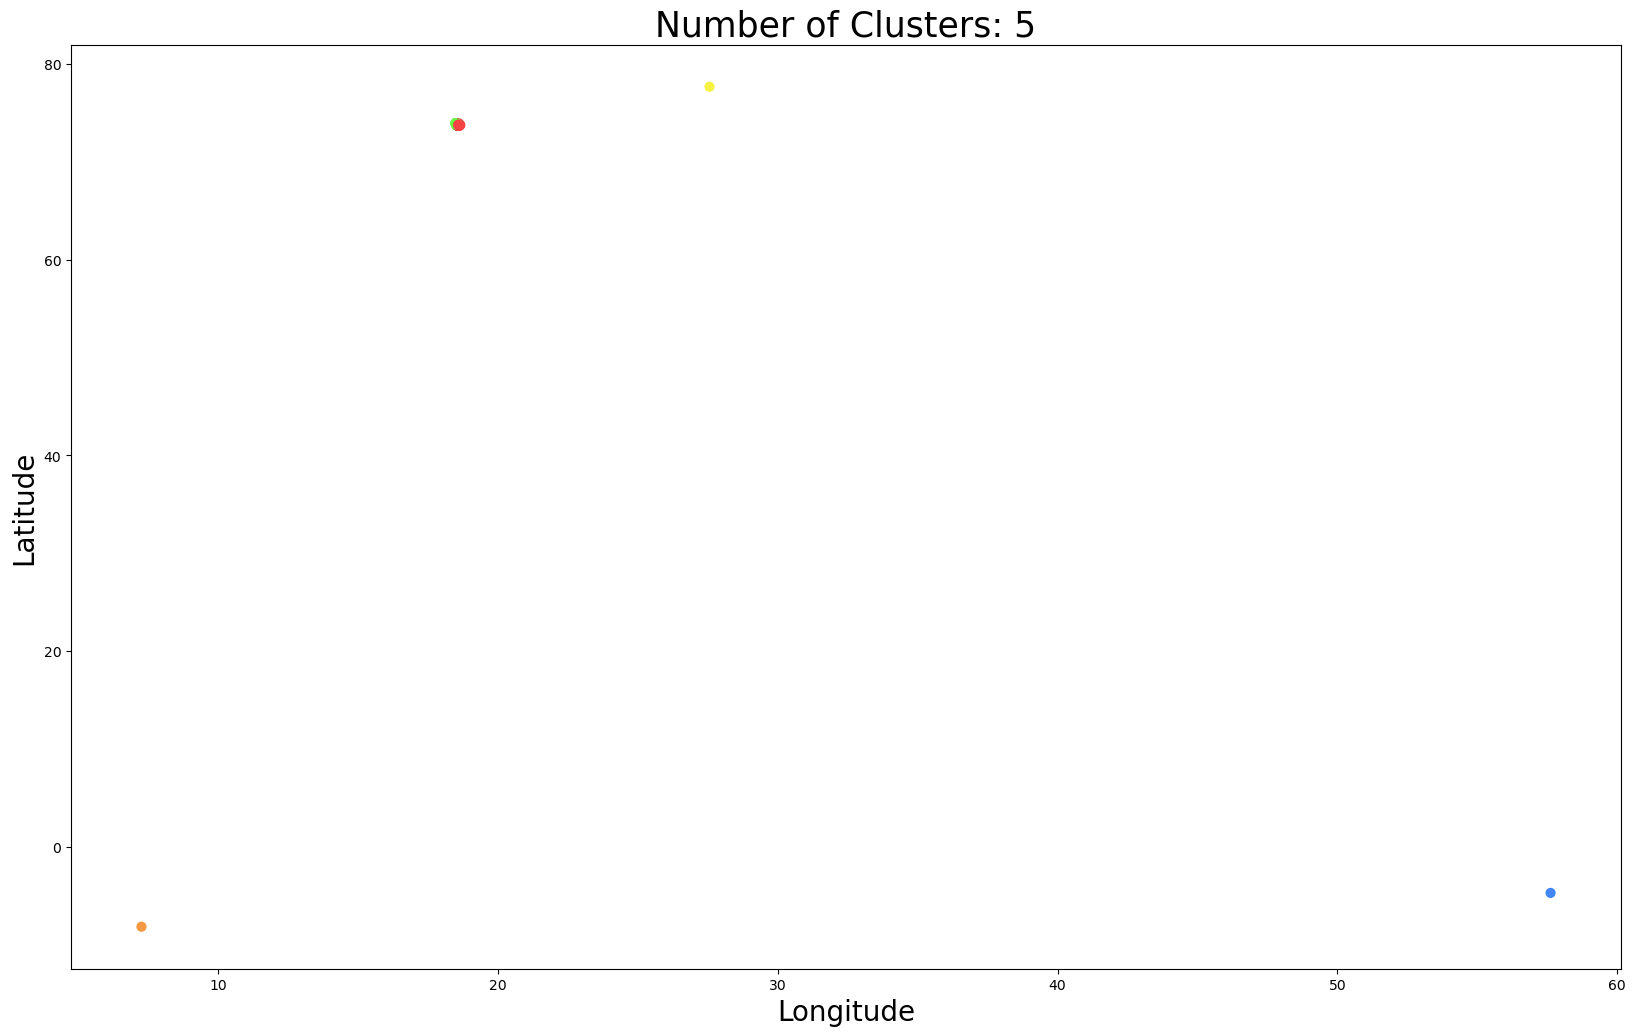

In [91]:

def plot_gmm(n):
    # Train a GMM and plot the results
    
    # Parameters
    n : int
        # Number of clusters
    
    #Fit gmm and get labels
    x = data[['Latitude','Longitude']].values
    gmm = sm.GaussianMixture(n_components=n, random_state=11,n_init=5)
    labels = gmm.fit(x).predict(x)
    
    #assign a colour to each label
    colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5']
    c = [colour[l] for l in labels]
    
    #scatter plot
    plt.figure(figsize=(20, 12))
    plt.scatter(x=x[:, 0], y=x[:, 1], c=c, s=40,  zorder=1)
    plt.title('Number of Clusters: {}'.format(n),size=25)
    plt.xlabel('Longitude',size=20)
    plt.ylabel('Latitude',size=20)
    
plot_gmm(5)


In [92]:
#Get gmm predictions
x = data[['Longitude','Latitude']].values
gmm = sm.GaussianMixture(n_components=5, random_state=11,n_init=5)
labels = gmm.fit(x).predict(x)

#create folium map 
m = folium.Map(
    location=[43.77923, -79.41731999999998],
    zoom_start=12,
    tiles='Stamen Terrain'
)

colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5']

#add markers to map 
for i in range(len(x)):
    lon = x[i][0]
    lat = x[i][1]
    label = labels[i]
    
    #assign colour based on label 
    c = colour[label]
    
    #add marker
    folium.CircleMarker(location=[lat,lon],
                        radius=2,
                        color=c,
                        fill_color=c).add_to(m) 
#display map
m.save('map.html')




C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [93]:
from IPython.display import display

# Display map inline
display(m)
